

# Database

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('spam.tsv', sep = '\t')

In [ ]:
#check if some daata is missing
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
(df['label'].value_counts()*100)/len(df)

label
ham     86.593683
spam    13.406317
Name: count, dtype: float64

In [ ]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [ ]:
df.head(10)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
6,ham,Even my brother is not like to speak with me. ...,77,2
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,6
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2



# Data exploration and processing

In [ ]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [ ]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [ ]:
print(ham.shape , spam.shape)

(4825, 4) (747, 4)


In [ ]:
#if we want to balance
ham = ham.sample(spam.shape[0])
ham.shape, spam.shape

((747, 4), (747, 4))

In [ ]:
#data = ham.append(spam , ignore_index = True)
#data.shape
data = pd.concat([ham, spam], ignore_index=True)
data.shape
data['label'].value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

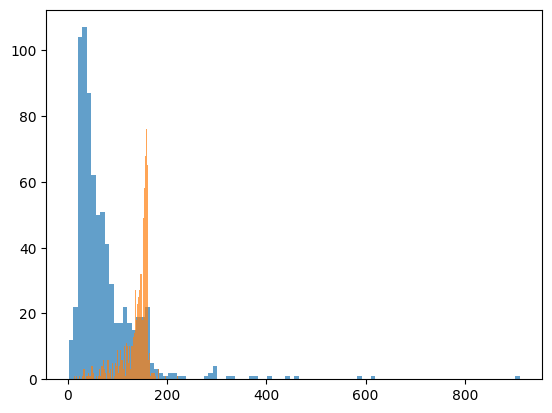

In [ ]:
plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha = 0.7)
plt.show() #isse matrix hide ho jata haii

# Split data in training and testing

In [ ]:
print(data)

     label                                            message  length  punct
0      ham      Yes, princess. Are you going to make me moan?      45      3
1      ham  Evry Emotion dsn't hav Words.Evry Wish dsn't h...     180     15
2      ham  No. On the way home. So if not for the long dr...      85      2
3      ham  I dont know ask to my brother. Nothing problem...      77      3
4      ham                      Thats cool. How was your day?      29      2
...    ...                                                ...     ...    ...
1489  spam  Want explicit SEX in 30 secs? Ring 02073162414...      90      3
1490  spam  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...     158      5
1491  spam  Had your contract mobile 11 Mnths? Latest Moto...     160      8
1492  spam  REMINDER FROM O2: To get 2.50 pounds free call...     147      3
1493  spam  This is the 2nd time we have tried 2 contact u...     160      8

[1494 rows x 4 columns]


In [ ]:
data

,label,message,length,punct
0,ham,"Yes, princess. Are you going to make me moan?",45,3
1,ham,Evry Emotion dsn't hav Words.Evry Wish dsn't h...,180,15
2,ham,No. On the way home. So if not for the long dr...,85,2
3,ham,I dont know ask to my brother. Nothing problem...,77,3
4,ham,Thats cool. How was your day?,29,2
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.3, random_state = 0, shuffle = True)

In [ ]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape )

(1045,) (449,) (1045,) (449,)


# **Apply random forest**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
classifier = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=0))
])

In [ ]:
classifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(random_state=0))])

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
y_test, y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.9576837416481069

In [ ]:
confusion_matrix(y_test, y_pred)

array([[225,   2],
       [ 17, 205]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.99      0.96       227
        spam       0.99      0.92      0.96       222

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', SVC(kernel='linear'))
])

In [ ]:
svm.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(kernel='linear'))])

In [ ]:
y_pred = svm.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[220,   7],
       [ 10, 212]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.96      0.97      0.96       227
        spam       0.97      0.95      0.96       222

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



# Testing

In [ ]:
test1 = ["Congratulations! You’ve won a $500 gift card to Target. Click here to claim your reward."]
test2 = ["Hello mom I will be home late."]

In [ ]:
test = input("Enter a message: ")

Enter a message: hi mummy i will come home late 


In [ ]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict([test]))

['spam']
['ham']
['ham']


In [ ]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict([test]))

['spam']
['ham']
['ham']
